<a href="https://colab.research.google.com/github/Edward-TL/Beer_Statistics/blob/master/only_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import scipy.stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import csv, os
from datetime import datetime

In [33]:
def csv_as_dictionary(file):
    with open(beer_csv, mode="r", encoding='utf-8', newline='') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)
        
        column_data = ''
        data_date = []
        av_temp = []
        min_temp = []
        max_temp = []
        precipitation = []
        was_a_weekend = []
        beer_consumed = []
        
        for row in csv_reader:
            #No 'problem'
    
            if row[0]!= '': data_date.append(datetime.strptime(row[0], '%Y-%m-%d'))
                
            if row[5] != '': was_a_weekend.append(bool(int(row[5])))
            
            #Comma problem
            if row[1] != '': av_temp.append(float(row[1].replace(',','.')))
            if row[2] != '': min_temp.append(float(row[2].replace(',','.')))
            if row[3] != '': max_temp.append(float(row[3].replace(',','.')))
            if row[4] != '': precipitation.append(float(row[4].replace(',','.')))
            
            #Period Problem
            if row[6] != '': beer_consumed.append(int(row[6].replace('.','')))
            
    csv_file.close()

    dictionary = {
        'date': data_date,
        'av_temp': av_temp,
        'min_temp': min_temp,
        'max_temp': max_temp,
        'precipitation': precipitation,
        'was_a_weekend': was_a_weekend,
        'beer_consumed': beer_consumed
    }
    return dictionary

In [34]:
beer_csv = '/content/drive/My Drive/Colab Notebooks/RetoCerveza/datasets_28454_184859_Consumo_cerveja.csv'

cerveza_dict = csv_as_dictionary(beer_csv)
cerveza_df = pd.DataFrame(cerveza_dict)
cerveza_df

,date,av_temp,min_temp,max_temp,precipitation,was_a_weekend,beer_consumed
0,2015-01-01,27.30,23.9,32.5,0.0,False,25461
1,2015-01-02,27.02,24.5,33.5,0.0,False,28972
2,2015-01-03,24.82,22.4,29.9,0.0,True,30814
3,2015-01-04,23.98,21.5,28.6,1.2,True,29799
4,2015-01-05,23.82,21.0,28.3,0.0,False,28900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,True,32307
361,2015-12-28,22.64,21.1,26.7,0.0,False,26095
362,2015-12-29,21.68,20.3,24.1,10.3,False,22309
363,2015-12-30,21.38,19.3,22.4,6.3,False,20467


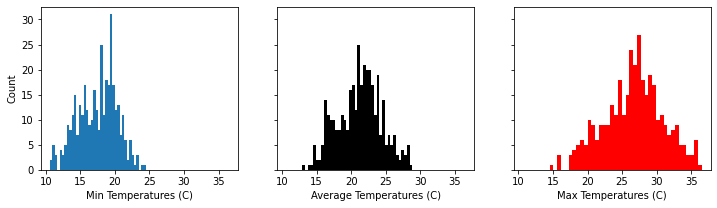

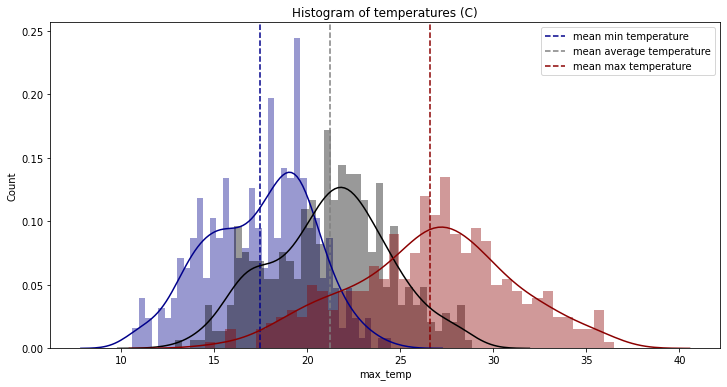

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3), sharey=True, sharex=True)
n_bins = 40

ax1.hist(cerveza_df['min_temp'], align = 'mid', bins = n_bins)
ax1.set_xlabel('Min Temperatures (C)')
ax1.set_ylabel('Count')

ax2.hist(cerveza_df['av_temp'], align = 'mid', color='k', bins = n_bins)
ax2.set_xlabel('Average Temperatures (C)')

ax3.hist(cerveza_df['max_temp'], align = 'mid', color='r', bins = n_bins)
ax3.set_xlabel('Max Temperatures (C)')

plt.show()

kwargs = dict(alpha=0.5, bins = 40, density=True, stacked = True)

plt.figure(figsize=(12,6))

x1=cerveza_df['min_temp']
x2=cerveza_df['av_temp']
x3=cerveza_df['max_temp']

# plt.hist(x1, **kwargs, color = 'b', label='min_temp')
# plt.hist(x2, **kwargs, color = 'k', label='av_temp')
# plt.hist(x3, **kwargs, color = 'r', label='max_temp')
plt.gca().set(title='Histogram of temperatures (C)', ylabel='Count')

plt.axvline(np.mean(x1), c='darkblue', linestyle='--', label = 'mean min temperature')
plt.axvline(np.mean(x2), c='gray', linestyle='--', label = 'mean average temperature')
plt.axvline(np.mean(x3), c='darkred', linestyle='--', label = 'mean max temperature')

sns.distplot(x1, bins=40, color='darkblue')
sns.distplot(x2, bins=40, color='k')
sns.distplot(x3, bins=40, color='darkred')

plt.legend()

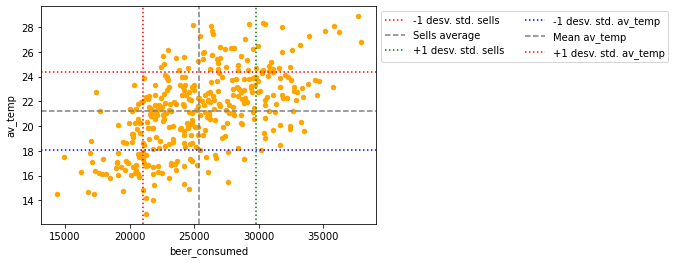

In [36]:
x=cerveza_df['beer_consumed']
y=cerveza_df['av_temp']
fig = cerveza_df.plot(kind="scatter", x = 'beer_consumed', y = 'av_temp',c = 'orange')

plt.axvline(np.mean(x)-np.std(x), c = 'r', linestyle = ':', label = '-1 desv. std. sells')
plt.axvline(np.mean(x), c = 'grey', linestyle = '--', label = 'Sells average')
plt.axvline(np.mean(x)+np.std(x), c = 'g', linestyle = ':', label = '+1 desv. std. sells')

plt.axhline(np.mean(y)-np.std(y), c = 'b', linestyle = ':', label = '-1 desv. std. av_temp')
plt.axhline(np.mean(y), c = 'grey', linestyle = '--', label = 'Mean av_temp')
plt.axhline(np.mean(y)+np.std(y), c = 'r', linestyle = ':', label = '+1 desv. std. av_temp')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=2)

plt.show()

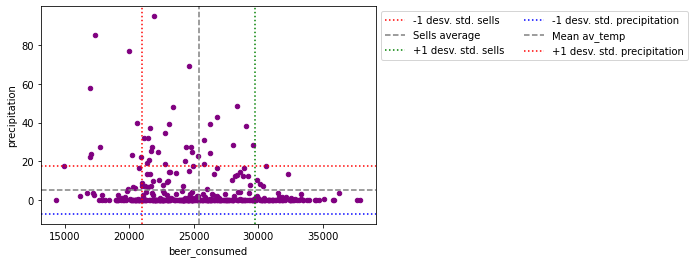

In [37]:
x=cerveza_df['beer_consumed']
y=cerveza_df['precipitation']
fig = cerveza_df.plot(kind="scatter", x = 'beer_consumed', y = 'precipitation',c = 'purple')

plt.axvline(np.mean(x)-np.std(x), c = 'r', linestyle = ':', label = '-1 desv. std. sells')
plt.axvline(np.mean(x), c = 'grey', linestyle = '--', label = 'Sells average')
plt.axvline(np.mean(x)+np.std(x), c = 'g', linestyle = ':', label = '+1 desv. std. sells')

plt.axhline(np.mean(y)-np.std(y), c = 'b', linestyle = ':', label = '-1 desv. std. precipitation')
plt.axhline(np.mean(y), c = 'grey', linestyle = '--', label = 'Mean av_temp')
plt.axhline(np.mean(y)+np.std(y), c = 'r', linestyle = ':', label = '+1 desv. std. precipitation')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=2)

plt.show()

In [38]:
def csv_as_arrays(file):
    with open(beer_csv, mode="r", encoding='utf-8', newline='') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)
        
        column_data = ''
        data_date = []
        av_temp = []
        min_temp = []
        max_temp = []
        precipitation = []
        was_a_weekend = []
        beer_consumed = []
        
        for row in csv_reader:
            #No 'problem'
    
            if row[0]!= '': data_date.append(datetime.strptime(row[0], '%Y-%m-%d'))
                
            if row[5] != '': was_a_weekend.append(bool(int(row[5])))
            
            #Comma problem
            if row[1] != '': av_temp.append(float(row[1].replace(',','.')))
            if row[2] != '': min_temp.append(float(row[2].replace(',','.')))
            if row[3] != '': max_temp.append(float(row[3].replace(',','.')))
            if row[4] != '': precipitation.append(float(row[4].replace(',','.')))
            
            #Period Problem
            if row[6] != '': beer_consumed.append(int(row[6].replace('.','')))
            
    csv_file.close()

    return data_date, was_a_weekend, av_temp, min_temp, max_temp, precipitation, beer_consumed

In [39]:
data_date, was_a_weekend, av_temp, min_temp, max_temp, precipitation, beer_consumed = csv_as_arrays(beer_csv)

In [89]:
def match_cases(array_filter, array):
  match_cases = []

  #Creating Support dictionaries
  wanted_cases = set(array_filter)
  
  for ub in range(len(array)):
    val = array[ub]
    if val in wanted_cases: match_cases.append(ub)
      
  return match_cases

def top_condisioned(array, start_value):
  helper_array = sorted_set(array.copy())
  helpers_end = len(helper_array) - 1
  ubication =  binary_search(helper_array, 0, helpers_end, start_value)
  
  top_condisioned = []
  for i in range(ubication, helpers_end):
    top_condisioned.append(helper_array[i])

  return top_condisioned

def sorted_set(array):
  reduced_set = set(array)
  reduced_array = []
  for element in reduced_set:
    reduced_array.append(element)
  reduced_array = merge_sort(reduced_array)

  return reduced_array

def binary_search(array, start, end, search_value):
  if start > end:
    return end
  
  middle = (start + end) // 2

  if array[middle] == search_value:
    return middle
  elif array[middle] < search_value:
    return binary_search(array, middle + 1, end, search_value)
  else:
    return binary_search(array, start, middle - 1, search_value)

def merge_sort(array):
  if len(array) > 1:
    middle = len(array) // 2
    left = array[:middle]
    right = array[middle:]

    merge_sort(left)
    merge_sort(right)
    
    """SubArrays Iterators"""
    i = 0
    j = 0
    """MainArray Iterator"""
    k = 0

    while i < len(left) and j < len(right):
      if left[i] < right[j]:
        array[k] = left[i]
        i += 1
      else:
        array[k] = right[j]
        j += 1
      
      k += 1

    while i < len(left):
      array[k] = left[i]
      i += 1
      k += 1

    while j < len(right):
      array[k] = right[j]
      j += 1
      k += 1

  return array

def boolean_clasification(array):
  true_array = []
  false_array = []

  for i in range(len(array)):
    if array[i] == True:
      true_array.append(array[i])
    else: false_array.append(array[i])
  
  return true_array, false_array

def extract_matches(array_filter, array):
    match_cases = []

    #Creating Support dictionaries
    wanted_cases = set(array_filter)

    for ub in range(len(array)):
        val = array[ub]
        if val in wanted_cases: match_cases.append(array[ub])
    return match_cases


def all_major_cases(array, value):
    major_cases = []

    for ub in range(len(array)):
        if array[ub] >= value: major_cases.append(array[ub])

    return major_cases

def all_minor_cases(array, value):
    minor_cases = []

    for ub in range(len(array)):
        if array[ub] <= value: minor_cases.append(array[ub])

    return minor_cases

def all_equal_cases(array, value):
    equal_cases = []

    for ub in range(len(array)):
        if array[ub] == value: equal_cases.append(array[ub])

    return equal_cases

def all_not_equal_cases(array, value):
    not_equal_cases = []

    for ub in range(len(array)):
        if array[ub] != value: not_equal_cases.append(array[ub])

    return not_equal_cases

def all_bool_cases(array, bool_value):
    bool_cases = []

    for ub in range(len(array)):
        if array[ub] == value: bool_cases.append(array[ub])

    return bool_cases

In [41]:
gta_sells = top_condisioned(beer_consumed,np.mean(beer_consumed))
len(best_sells)

166

In [51]:
ub_gta_sells = match_cases(gta_sells, beer_consumed)

[]


In [91]:
gta_av_temp = []
gta_week_day = []
gta_precipitation = []

for i in range(len(ub_gta_sells)):
  match = ub_gta_sells[i]
  gta_av_temp.append(av_temp[match])
  gta_week_day.append(was_a_weekend[match])
  gta_precipitation.append(precipitation[match])

print(f'len of gta_av_temp: {len(gta_av_temp)}')
print(f'len of gta_week_day: {len(gta_week_day)}')
print(f'len of gta_precipitation: {len(gta_precipitation)}')

gta_weekend_sells, gta_middle_week_sells = boolean_clasification(gta_week_day)
print(f'\nlen of gta_weekend_sells: {len(gta_weekend_sells)}')
print(f'len of gta_middle_week_sells: {len(gta_middle_week_sells)}')

len of gta_av_temp: 167
len of gta_week_day: 167
len of gta_precipitation: 167

len of gta_weekend_sells: 80
len of gta_middle_week_sells: 87


In [58]:
pls_std_best_sells = np.mean(beer_consumed)+np.std(beer_consumed)
best_sells = top_condisioned(beer_consumed,pls_std_best_sells)
print(best_sells)
print(len(best_sells))
print(max(best_sells))

ub_best_sells = match_cases(best_sells, beer_consumed)

[29760, 29799, 29829, 29926, 29938, 29972, 30127, 30177, 30231, 30300, 30329, 30345, 30392, 30471, 30479, 30498, 30505, 30524, 30617, 30740, 30775, 30814, 30825, 30943, 31088, 31108, 31129, 31139, 31310, 31387, 31572, 31649, 31655, 31663, 31681, 31825, 31833, 31836, 31933, 32057, 32184, 32307, 32451, 32467, 32473, 32536, 32589, 32666, 32713, 32780, 32872, 32983, 33182, 33298, 33330, 33450, 33517, 33822, 33930, 34382, 34496, 34695, 35127, 35781, 35861, 36254, 37690]
67
37690


In [62]:
best_av_temp = []
best_week_day = []
best_precipitation = []

for i in range(len(ub_best_sells)):
  match = ub_best_sells[i]
  best_av_temp.append(av_temp[match])
  best_week_day.append(was_a_weekend[match])
  best_precipitation.append(precipitation[match])

print(f'len of best_av_temp: {len(best_av_temp)}')
print(f'len of best_week_day: {len(best_week_day)}')
print(f'len of best_precipitation: {len(best_precipitation)}')

len of best_av_temp: 67
len of best_week_day: 67
len of best_precipitation: 67


In [105]:
set_of_best_and_hotday_sells = top_condisioned(best_av_temp, np.mean(av_temp))
print(set_of_best_and_hotday_sells)
print(len(set_of_best_and_hotday_sells))


[21.22, 21.74, 21.8, 22.08, 22.1, 22.26, 22.3, 22.36, 22.38, 22.48, 22.52, 22.76, 22.82, 22.84, 23.06, 23.12, 23.16, 23.18, 23.28, 23.36, 23.6, 23.7, 23.74, 23.86, 23.98, 24.0, 24.04, 24.16, 24.32, 24.4, 24.42, 24.44, 24.5, 24.62, 24.72, 24.8, 24.82, 25.2, 25.96, 26.14, 26.5, 26.56, 27.26, 27.62, 27.68, 28.0, 28.12, 28.26, 28.3]
49


In [65]:
best_weekend_sells, best_middle_week_sells = boolean_clasification(best_week_day)
print(f'Quantity of best_weekend_sells: {len(best_weekend_sells)}')
print(f'Quantity of best_middle_week_sells: {len(best_middle_week_sells)}')


print(f'\nQuantity of gta_weekend_sells: {len(gta_weekend_sells)}')
print(f'Quantity of gta_middle_week_sells: {len(gta_middle_week_sells)}')

Quantity of best_weekend_sells: 47
Quantity of best_middle_week_sells: 20

Quantity of gta_weekend_sells: 80
Quantity of gta_middle_week_sells: 87


In [74]:
def bool_and_major_matches(bool_array, bool_wanted, numeric_array, start_limit):
    if len(bool_array) == len(numeric_array):
        match_cases = []

        #Creating Support dictionaries
        
        for ub in range(len(bool_array)):
            bool_val = bool_array[ub]
            numeric_val = numeric_array[ub]
            if bool_val == bool_wanted and numeric_val >= start_limit:
                match_cases.append(ub)
            
        return match_cases
    else: pass

def bool_and_minor_matches(bool_array, bool_wanted, numeric_array, end_limit):
    if len(bool_array) == len(numeric_array):
        match_cases = []

        #Creating Support dictionaries
        
        for ub in range(len(bool_array)):
            bool_val = bool_array[ub]
            numeric_val = numeric_array[ub]
            if bool_val == bool_wanted and numeric_val <= end_limit:
                match_cases.append(ub)
            
        return match_cases
    else: pass

In [103]:
print('Mejores ventas en días que:')
rainy_and_weekend_best_sells = bool_and_major_matches(best_week_day, True, best_precipitation, 0.01)
ndays_raw_bs = len(rainy_and_weekend_best_sells)
print(f'-> llovieron y eran fin de semana: {ndays_raw_bs}')

dry_and_weekend_best_sells = bool_and_minor_matches(best_week_day, True, best_precipitation, 0)
ndays_daw_bs = len(dry_and_weekend_best_sells)
print(f'-> no llovieron y eran fin de semana: {ndays_daw_bs}')

rainy_and_middle_week_best_sells = bool_and_major_matches(best_week_day, False, best_precipitation, 0.01)
ndays_ramw_bs = len(rainy_and_middle_week_best_sells)
print(f'-> llovieron y eran en mitad de semana: {ndays_ramw_bs}')

dry_and_middleweek_best_sells = bool_and_minor_matches(best_week_day, False, best_precipitation, 0)
ndays_damw_bs = len(dry_and_middleweek_best_sells)
print(f'-> no llovieron y eran entre semana: {ndays_damw_bs}')

print(f'total = {ndays_raw_bs + ndays_daw_bs + ndays_ramw_bs + ndays_damw_bs}')

Mejores ventas en días que:
-> llovieron y eran fin de semana: 15
-> no llovieron y eran fin de semana: 32
-> llovieron y eran en mitad de semana: 6
-> no llovieron y eran entre semana: 14
total = 67
[1, 2, 12, 17, 24, 29, 45, 48, 55, 58, 60, 61, 63, 64, 66]
